In [ ]:
!nvidia-smi

Thu Apr 24 00:38:00 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.5/983.5 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 121.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 99.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal


image 1/1 /content/fire1.jpg: 480x640 2 smokes, 4 fires, 38.9ms
Speed: 13.5ms preprocess, 38.9ms inference, 349.1ms postprocess per image at shape (1, 3, 480, 640)


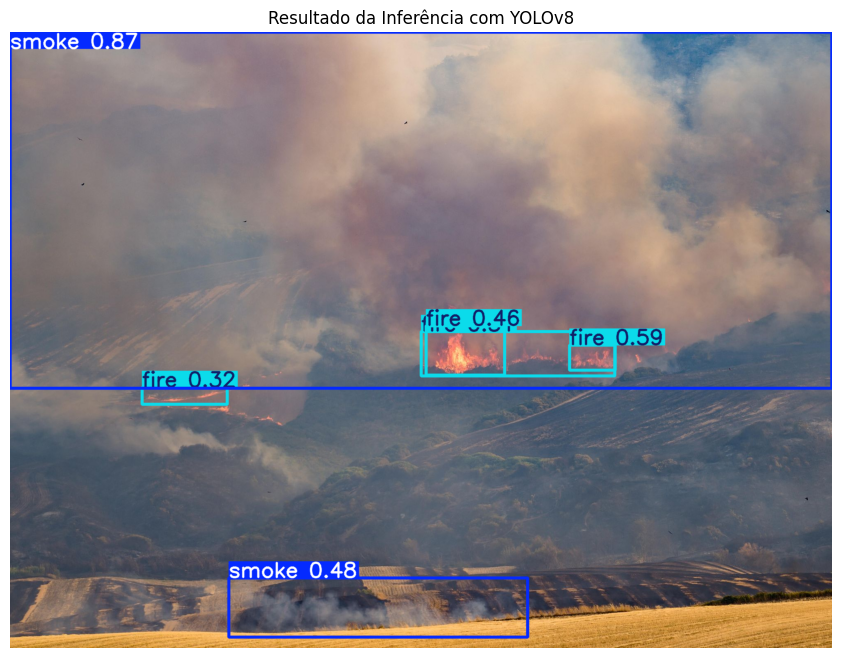

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

model = YOLO("fire_n.pt")

results = model("fire1.jpg")

annotated_frame = results[0].plot()

annotated_frame_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)

# Mostrar imagem
plt.figure(figsize=(12, 8))
plt.imshow(annotated_frame_rgb)
plt.axis("off")
plt.title("Resultado da Inferência com YOLOv8")
plt.show()



In [ ]:
!pip uninstall numpy scikit-learn -y
!pip install numpy==1.24.4 scikit-learn==1.2.2


Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
  Using cached scikit_learn-1.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 93.5 MB/s eta 0:00:00
Using cached scikit_learn-1.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is incompatible.
blosc2 3.3.0 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import pickle
import bz2

model_C = pickle.load(bz2.BZ2File('classification.pkl', 'rb'))  # Classificação: risco ou não
model_R = pickle.load(bz2.BZ2File('regression.pkl', 'rb'))      # Regressão: previsão do FWI

# Carregar o dataset para treinar o scaler
df = pd.read_csv('Algerian_forest_fires_dataset_CLEANED.csv')

# Selecionar apenas as 5 features utilizadas
features = ['Temperature', 'Ws', 'FFMC', 'DMC', 'ISI']
df = df[features]

# Treinar o scaler com o dataset original
scaler = StandardScaler()
scaler.fit(df)

# ['Temperature', 'Ws', 'FFMC', 'DMC', 'ISI']
mock_data_risk = np.array([
    [31, 14, 82.6, 5.8, 3.1],
    [33, 13, 88.2, 9.9, 6.4],
])

mock_data_safe = np.array([
    [29, 13, 64.4, 4.1, 1.0],
    [25, 13, 28.6, 1.3, 0.0],
])

for i, mock_data in enumerate([*mock_data_risk, *mock_data_safe], 1):
    scaled_data = scaler.transform([mock_data])

    class_result = model_C.predict(scaled_data)[0]
    regression_result = model_R.predict(scaled_data)[0]

    status = "🔥 Perigo de Incêndio" if class_result == 1 else "✅ Condição Segura"
    print(f"[EXEMPLO {i}] {status} | FWI estimado: {regression_result:.2f}")


[EXEMPLO 1] ✅ Condição Segura | FWI estimado: 2.77
[EXEMPLO 2] 🔥 Perigo de Incêndio | FWI estimado: 8.23
[EXEMPLO 3] ✅ Condição Segura | FWI estimado: 0.41
[EXEMPLO 4] ✅ Condição Segura | FWI estimado: 0.00


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.